# Бустинг. Практика

In [1]:
import pandas as pd
import numpy as np

## Задание 4.1

Подготовим данные для решения этого задания. Загрузим датасет, в котором будем определять, является ли письмо спамом.

In [56]:
df = pd.read_csv('data/spam7.csv')
df.head(5)

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y


Из столбца `yesno` сделайте столбец `spam`, где 1 соответствует значению `y` (является спамом), а 0 – `n` (не является спамом). Удалите первый столбец (с индексом) и столбец `yesno`.

У Вас остается шесть столбцов-признаков и один столбец `spam`, который является нашей целевой переменной. Разделим их на $x$ и $y$.

In [57]:
df['spam'] = (df['yesno'] == 'y').astype(int)

In [58]:
df.drop(['Unnamed: 0', 'yesno'], axis=1, inplace=True)

In [59]:
df.head(5)

,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1


Теперь мы хотим создать новые признаки путем попарного перемножения уже имеющихся друг на друга. Сколько получится признаков после преобразования (включая те шесть, которые были в исходных данных)?

$ C_{6}^{2} = \frac{6!}{2! \cdot (6-2)!} = \frac{6!}{2! \cdot 4!} = \frac{5 \cdot 6}{1 \cdot 2} = 15 $

In [60]:
from itertools import combinations

In [61]:
fs = df.drop(['spam'], axis=1).columns
for f1, f2 in combinations(fs, 2):
    n = f'{f1}_{f2}'
    df.loc[:, n] = df[f1] * df[f2]

In [62]:
df.head(5)

,crl.tot,dollar,bang,money,n000,make,spam,crl.tot_dollar,crl.tot_bang,crl.tot_money,...,dollar_bang,dollar_money,dollar_n000,dollar_make,bang_money,bang_n000,bang_make,money_n000,money_make,n000_make
0,278,0.000,0.778,0.00,0.00,0.00,1,0.000,216.284,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
1,1028,0.180,0.372,0.43,0.43,0.21,1,185.040,382.416,442.04,...,0.066960,0.07740,0.07740,0.03780,0.15996,0.15996,0.07812,0.1849,0.0903,0.0903
2,2259,0.184,0.276,0.06,1.16,0.06,1,415.656,623.484,135.54,...,0.050784,0.01104,0.21344,0.01104,0.01656,0.32016,0.01656,0.0696,0.0036,0.0696
3,191,0.000,0.137,0.00,0.00,0.00,1,0.000,26.167,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4,191,0.000,0.135,0.00,0.00,0.00,1,0.000,25.785,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000


In [64]:
x = df.drop(['spam'], axis=1)
y = df['spam']

In [65]:
print(f'answer: {x.shape[1]}')

answer: 21


## Задание 4.2

Разделим получившиеся данные на обучающую и тестовую выборки в соотношении 80:20. Обучите модель `GradientBoostingClassifier` (из библиотеки *sklearn*), используя параметры "по умолчанию" (на момент создания урока это `learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features=None`).

Во всех методах, где присутствует случайность, укажите `random_state=42`.

Это будет наш *baseline*. Укажите точность на тестовой выборке (параметр `score`), округлив до третьего знака после точки-разделителя.

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
solver = GradientBoostingClassifier(random_state=42)
solver.fit(x_train, y_train)

y_pred = solver.predict(x_test)

In [69]:
score = solver.score(x_test, y_test)
print(f'Score on test subset: {score:.3f}')

Score on test subset: 0.865


## Задание 4.3

Воспользуйтесь методом `feature_importances_`. С его помощью можно оценить вклад каждого признака в обучение модели. Постройте столбчатую диаграмму так, чтобы по горизонтали были указаны названия признаков, а по вертикали их важность.


In [70]:
import matplotlib.pyplot as plt

<BarContainer object of 21 artists>

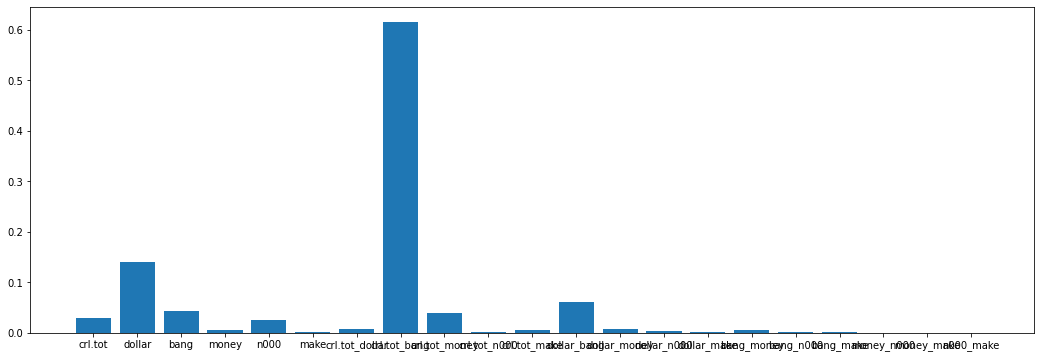

In [73]:
plt.figure(figsize=(18,6))
plt.bar(x.columns, solver.feature_importances_)

## Задание 4.4

Теперь перейдем к подбору параметров в модели. Для этого в библиотеке *scikit-learn* есть метод `GridSearchCV`. Ему на вход подается модель, список параметров и способ оценивания. При запуске метода `fit` модель обучается со всеми возможными комбинациями параметров, лучшей комбинацией параметров становится та, при которой значение метрики максимально.

Укажите в качестве `estimator` градиетный бустинг с параметрами "по умолчанию" и `random_state=42`. В параметре `scoring` укажите `accuracy`, `n_jobs=-1`, `cv=5`.

Сетку параметров задайте такой:

```
param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}
```

В ответе укажите точность лучшей комбинации параметров, округленную до трёх знаков после точки-разделителя.

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
grid = GridSearchCV(
    estimator=solver,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    param_grid={
        'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
        'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]
    }
)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [77]:
print(f'score: {grid.best_score_:.3f}')

score: 0.884


## Задание 4.5

Подбор параметров — незаменимый инструмент при настройке моделей. Однако, если данных очень много, а модель сложная, то иногда имеет смысл ограничить количество параметров, которые вы хотите перебрать. Если модель с одним набором параметров обучается 30 минут, а вы хотите перебрать 10 таких наборов, то стоит приготовиться к пятичасовому ожиданию. Также стоит учитывать, что размер некоторых параметров влияет на время, потраченное на обучение моделей. Например, менее глубокие деревья учатся быстрее, чем глубокие.

При использовании *GridSearchCV* перебираются все возможные способы комбинации параметров. Сколько разных моделей (моделей градиентного бустинга с разными наборами параметров) обучилось в прошлом задании?

In [82]:
len(grid.param_grid['learning_rate']) * len(grid.param_grid['n_estimators'])

48

## Задание 4.6

Теперь воспользуемся *GridSearchCV* для подбора максимальной глубины (`max_depth`). В качестве `estimator` используйте градиентный бустинг с ранее подобранными параметрами и `random_state=42`. Переберите все значения `max_depth` от 5 до 15 включительно. В ответ запишите значение параметра, при котором точность максимальна.

In [83]:
solver = GradientBoostingClassifier(random_state=42)
grid = GridSearchCV(
    estimator=solver,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    param_grid={
        'max_depth':[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    }
)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
             scoring='accuracy')

In [86]:
grid.best_params_['max_depth']

5

## Задание 4.7

Может показаться, что, научившись запускать готовые фукнции из библиотек и настраивать параметры, мы абсолютно готовы к работе. Однако на поле боя нас могут подстерегать еще опасности — *legacy code*, то есть код, написанный кем-то до вас. Может быть, его можно было бы и улучшить, но на нём уже столько всего надстроено, что переписывать всё практически невозможно.

А ещё часто будет возникать необходимость просто понять код коллеги или сделать *code review* (грубо говоря, это анализ кода на предмет ошибок и расхождения в стиле). Во всех этих ситуациях необходим навык быcтрого чтения кода.

Поэтому в качестве примера в этом задании мы предлагаем изучить код для реализации *AdaBoost* с нуля. Вам необходимо запустить эту функцию, но с дописанными строчками (вычисление ошибки и веса алгоритма) на всех признаках, получившихся после всех преобразований в предыдущем датасете (до разделения выборки на обучающую и тестовую). Параметр `learning_rate` возьмите равным 0.001, `М = 10`. В ответ запишите точность, округленную до трёх знаков после точки-разделителя.

За основу нужно взять следующий код:

```py
def AdaBoost_scratch(X,y, M=10, learning_rate =1):
	# инициалиазция служебных переменных
	N = len(y)
	estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]
	
	# инициализация весов
	sample_weight = np.ones(N) / N
	sample_weight_list.append(sample_weight.copy())
	
	# цикл по длине М
	for m in range(M):

		# обучим базовую модель и получим предсказание
		estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
		estimator.fit(X, y, sample_weight=sample_weight)
		y_predict = estimator.predict(X)
		
		# Маска для ошибок классификации
		incorrect = (y_predict != y)
		
		# Оцениваем ошибку
		#estimator_error = TODO 
		
		# Вычисляем вес нового алгоритма
		#estimator_weight =  TODO
	
		sample_weight *= np.exp(estimator_weight * incorrect * > 0) | (estimator_weight < 0)

		# Сохраяем результаты данной итерации
		estimator_list.append(estimator)
		y_predict_list.append(y_predict.copy())
		estimator_error_list.append(estimator_error.copy())
		estimator_weight_list.append(estimator_weight.copy())
		sample_weight_list.append(sample_weight.copy())

	# Для удобства переведем в numpy.array
	estimator_list = np.asarray(estimator_list)
	y_predict_list = np.asarray(y_predict_list)
	estimator_error_list = np.asarray(estimator_error_list)
	estimator_weight_list = np.asarray(estimator_weight_list)
	sample_weight_list = np.asarray(sample_weight_list)

	# Получим предсказания
	
	preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
	print('Accuracy = ', accuracy_score(preds, y))

	return estimator_list, estimator_weight_list, sample_weight_list
y = y.replace({0:-1})
estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(X_new, y, M=10, learning_rate=0.001)
```

In [88]:
def AdaBoost_scratch(X, y, M=10, learning_rate=1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y)

        # Оцениваем ошибку
        #estimator_error = TODO 

        # Вычисляем вес нового алгоритма
        #estimator_weight =  TODO

        sample_weight *= np.exp(estimator_weight * incorrect * > 0) | (estimator_weight < 0)

        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())

    # Для удобства переведем в numpy.array
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания

    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', accuracy_score(preds, y))

    return estimator_list, estimator_weight_list, sample_weight_list

SyntaxError: invalid syntax (<ipython-input-88-7abef17e2c43>, line 27)

In [91]:
y = y.replace({0:-1})
estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(x, y, M=10, learning_rate=0.001)

NameError: name 'AdaBoost_scratch' is not defined